/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 1/100, Total Reward: -3
Episode 2/100, Total Reward: 24
Episode 3/100, Total Reward: 8
Episode 4/100, Total Reward: 1
Episode 5/100, Total Reward: 9
Episode 6/100, Total Reward: 10
Episode 7/100, Total Reward: 3
Episode 8/100, Total Reward: 23
Episode 9/100, Total Reward: 7
Episode 10/100, Total Reward: 2
Episode 11/100, Total Reward: 5
Episode 12/100, Total Reward: 5
Episode 13/100, Total Reward: 4
Episode 14/100, Total Reward: 29
Episode 15/100, Total Reward: 11
Episode 16/100, Total Reward: 1
Episode 17/100, Total Reward: 6
Episode 18/100, Total Reward: 0
Episode 19/100, Total Reward: 0
Episode 20/100, Total Reward: 7
Episode 21/100, Total Reward: 15
Episode 22/100, Total Reward: 7
Episode 23/100, Total Reward: 10
Episode 24/100, Total Reward: 11
Episode 25/100, Total Reward: 34
Episode 26/100, Total Reward: 41
Episode 27/100, Total Reward: 9
Episode 28/100, Total Reward: 9
Episode 29/100, Total Reward: 31
Episode 30/100, Total Reward: 17
Episode 31/100, Total Reward: 30
Epi

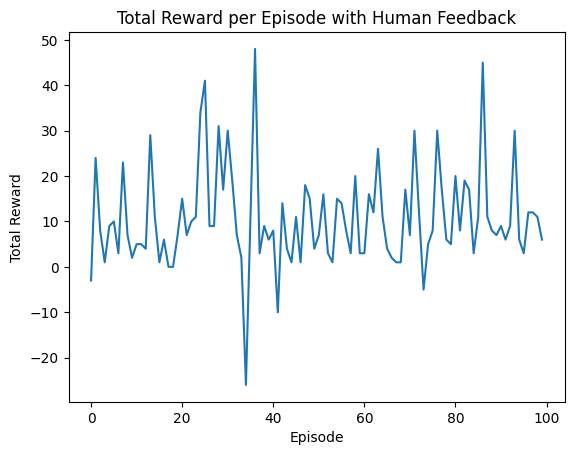

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

class HumanFeedbackAgent:
    def __init__(self, env):
        self.env = env
        self.state = env.reset()
        self.total_reward = 0

    def act(self, state):
        # Simple policy: Choose a random action
        return self.env.action_space.sample()

    def update_policy(self, state, action, reward, next_state, done):
        # Normally, you'd update your policy here based on the feedback
        pass

    def get_human_feedback(self, state, action):
        # Simulate human feedback
        feedback = -1 if abs(state[2]) > 0.1 else 1
        return feedback

def train(env, agent, episodes):
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            feedback = agent.get_human_feedback(state, action)
            agent.update_policy(state, action, feedback, next_state, done)
            state = next_state
            total_reward += feedback

        rewards.append(total_reward)
        print(f"Episode {episode+1}/{episodes}, Total Reward: {total_reward}")
    return rewards

# Main function to run the training
def main():
    env = gym.make('CartPole-v1')
    agent = HumanFeedbackAgent(env)
    episodes = 100
    rewards = train(env, agent, episodes)

    # Plot the rewards
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Reward per Episode with Human Feedback')
    plt.show()

if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
<ipython-input-3-a95ef2b89bf9>:58: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarra

Episode 1/100, Total Reward: 3
Episode 2/100, Total Reward: 2
Episode 3/100, Total Reward: 4
Episode 4/100, Total Reward: 6
Episode 5/100, Total Reward: 5
Episode 6/100, Total Reward: 5
Episode 7/100, Total Reward: 6
Episode 8/100, Total Reward: 4
Episode 9/100, Total Reward: 3
Episode 10/100, Total Reward: 5
Episode 11/100, Total Reward: 3
Episode 12/100, Total Reward: 5
Episode 13/100, Total Reward: 4
Episode 14/100, Total Reward: 0
Episode 15/100, Total Reward: 17
Episode 16/100, Total Reward: 2
Episode 17/100, Total Reward: 4
Episode 18/100, Total Reward: 5
Episode 19/100, Total Reward: 5
Episode 20/100, Total Reward: 6
Episode 21/100, Total Reward: 5
Episode 22/100, Total Reward: 5
Episode 23/100, Total Reward: 1
Episode 24/100, Total Reward: -32
Episode 25/100, Total Reward: 27
Episode 26/100, Total Reward: 8
Episode 27/100, Total Reward: 19
Episode 28/100, Total Reward: 61
Episode 29/100, Total Reward: 50
Episode 30/100, Total Reward: 96
Episode 31/100, Total Reward: 167
Episode

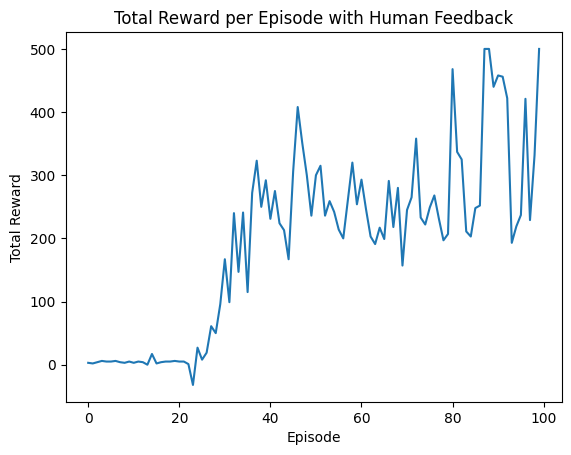

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque

class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class DQNAgent:
    def __init__(self, env, alpha=0.001, gamma=0.99, epsilon=0.1, epsilon_decay=0.995, min_epsilon=0.01, memory_size=10000, batch_size=64):
        self.env = env
        self.state_dim = env.observation_space.shape[0]
        self.action_dim = env.action_space.n
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.batch_size = batch_size
        self.memory = deque(maxlen=memory_size)
        self.model = DQN(self.state_dim, self.action_dim)
        self.target_model = DQN(self.state_dim, self.action_dim)
        self.optimizer = optim.Adam(self.model.parameters(), lr=alpha)
        self.update_target_model()

    def update_target_model(self):
        self.target_model.load_state_dict(self.model.state_dict())

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        state = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            q_values = self.model(state)
        return torch.argmax(q_values).item()

    def replay(self):
        if len(self.memory) < self.batch_size:
            return
        batch = random.sample(self.memory, self.batch_size)
        state_batch, action_batch, reward_batch, next_state_batch, done_batch = zip(*batch)

        state_batch = torch.FloatTensor(state_batch)
        action_batch = torch.LongTensor(action_batch).unsqueeze(1)
        reward_batch = torch.FloatTensor(reward_batch).unsqueeze(1)
        next_state_batch = torch.FloatTensor(next_state_batch)
        done_batch = torch.FloatTensor(done_batch).unsqueeze(1)

        q_values = self.model(state_batch).gather(1, action_batch)
        next_q_values = self.target_model(next_state_batch).max(1)[0].unsqueeze(1)
        target_q_values = reward_batch + self.gamma * next_q_values * (1 - done_batch)

        loss = nn.MSELoss()(q_values, target_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        if self.epsilon > self.min_epsilon:
            self.epsilon *= self.epsilon_decay

    def get_human_feedback(self, state, action):
        # Simulate human feedback
        feedback = -1 if abs(state[2]) > 0.1 else 1
        return feedback

def train(env, agent, episodes):
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            feedback = agent.get_human_feedback(state, action)
            agent.remember(state, action, feedback, next_state, done)
            agent.replay()
            state = next_state
            total_reward += feedback
        agent.update_target_model()
        rewards.append(total_reward)
        print(f"Episode {episode+1}/{episodes}, Total Reward: {total_reward}")
    return rewards

# Main function to run the training
def main():
    env = gym.make('CartPole-v1')
    agent = DQNAgent(env)
    episodes = 100
    rewards = train(env, agent, episodes)

    # Plot the rewards
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Reward per Episode with Human Feedback')
    plt.show()

if __name__ == "__main__":
    main()
